In [1]:
from params import input_params, time_params
from random_dna_chem import RandomDNAStrandDisplacementCircuit
from perturb_chem import RandomDNAChemPerturbationGillespy2
from collections import OrderedDict
import matplotlib.pyplot as plt
import sys, getopt
%matplotlib inline


Text(0, 0.5, 'Number of molecules')

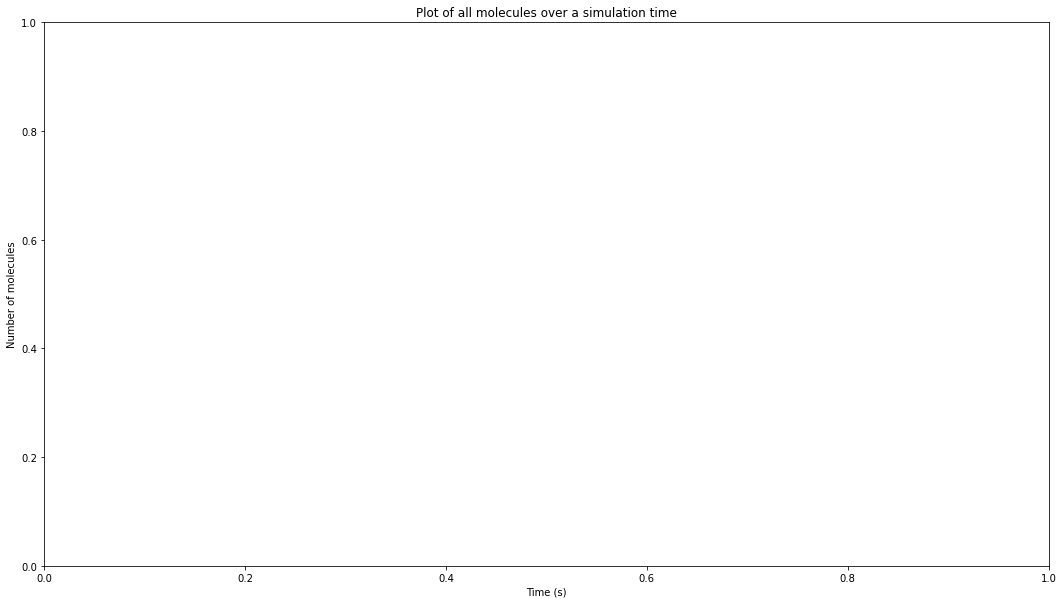

In [2]:
randomDNAChem = RandomDNAStrandDisplacementCircuit(input_params=input_params, 
                                                   time_params=time_params)

color_array = ['#000000', '#0000FF', '#00FF00', '#00FFFF', '#000080',
               '#008000', '#008080', '#800000', '#800080', '#808000',
               '#808080', '#C0C0C0', '#FF0000', '#FF00FF', '#FFFF00',
               '#8B0000', '#006400', '#BDB76B', '#008B8B', '#191970']

plt.figure(figsize = (18,10))
plt.title('Plot of all molecules over a simulation time')
plt.xlabel('Time (s)')
plt.ylabel('Number of molecules')

In [3]:
gillespy2_results = []
num_trajectories = 2

2020-03-26 23:18:12,646 - root - WARNING -  Unable to use Cython optimized SSA: Building module gillespy2.solvers.cython.cython_ssa_solver failed: ['distutils.errors.DistutilsPlatformError: Unable to find vcvarsall.bat\n']. The performance of this package can be significantly increased if you install Cython.


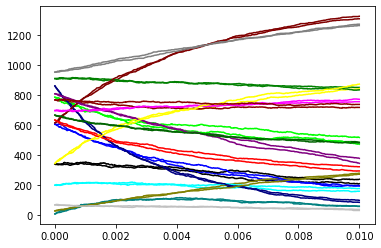

In [4]:
# Creating the Gillespy2 chemistry model in the non-perturb period
gillespy2_model = RandomDNAChemPerturbationGillespy2(non_gillespy2_chem=randomDNAChem,
                                                     rate_in_timeIndex=0, # index 0 for time t=0
                                                     period_start=randomDNAChem.time_params['time_array'][0],
                                                     period_end=randomDNAChem.time_params['time_array'][1],
                                                     previous_gillespy2_result=None)

# Result of stochastic Gillespie simulation for non-perturbation period
gillespy2_result = gillespy2_model.run(number_of_trajectories=num_trajectories)

# Result of stochastic Gillespie simulation for entire simulation time
gillespy2_results.append(gillespy2_result)

# Plot non-perturb period
for index in range(num_trajectories):
    trajectory = gillespy2_result[index]
    for species_index, species in enumerate(randomDNAChem.species_lookup['S']):
        species_plot = plt.plot(trajectory['time'],
                                trajectory['{}'.format(species)],
                                color=color_array[species_index],
                                label=species)

In [5]:
print(len(gillespy2_results))

1


In [6]:
print(len(gillespy2_result))

2


In [7]:
print(gillespy2_result)

[{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([342., 340., 339., ..., 209., 210., 211.]), 'U1': array([607., 607., 605., ..., 196., 196., 196.]), 'U2': array([787., 786., 786., ..., 521., 520., 519.]), 'L0': array([201., 201., 203., ..., 161., 161., 161.]), 'L1': array([862., 859., 855., ..., 100., 100., 100.]), 'L2': array([911., 911., 910., ..., 852., 852., 852.]), 'L3': array([10., 10., 10., ..., 61., 61., 61.]), 'U1L1': array([ 616.,  617.,  618., ..., 1309., 1309., 1309.]), 'U0L1': array([810., 810., 811., ..., 382., 381., 380.]), 'U0L0': array([ 30.,  32.,  32., ..., 281., 281., 281.]), 'U0L3': array([ 954.,  954.,  954., ..., 1264., 1264., 1264.]), 'U1L0': array([70., 70., 70., ..., 40., 40., 40.]), 'U1L3': array([635., 634., 634., ..., 324., 324., 324.]), 'U1L2': array([698., 698., 699., ..., 757., 757., 757.]), 'U2L1': array([346., 348., 350., ..., 843., 844., 845.]), 'U2L3': array([769., 770., 770., ..., 719., 719., 719.]), 'U

In [8]:
print(gillespy2_result[0])

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([342., 340., 339., ..., 209., 210., 211.]), 'U1': array([607., 607., 605., ..., 196., 196., 196.]), 'U2': array([787., 786., 786., ..., 521., 520., 519.]), 'L0': array([201., 201., 203., ..., 161., 161., 161.]), 'L1': array([862., 859., 855., ..., 100., 100., 100.]), 'L2': array([911., 911., 910., ..., 852., 852., 852.]), 'L3': array([10., 10., 10., ..., 61., 61., 61.]), 'U1L1': array([ 616.,  617.,  618., ..., 1309., 1309., 1309.]), 'U0L1': array([810., 810., 811., ..., 382., 381., 380.]), 'U0L0': array([ 30.,  32.,  32., ..., 281., 281., 281.]), 'U0L3': array([ 954.,  954.,  954., ..., 1264., 1264., 1264.]), 'U1L0': array([70., 70., 70., ..., 40., 40., 40.]), 'U1L3': array([635., 634., 634., ..., 324., 324., 324.]), 'U1L2': array([698., 698., 699., ..., 757., 757., 757.]), 'U2L1': array([346., 348., 350., ..., 843., 844., 845.]), 'U2L3': array([769., 770., 770., ..., 719., 719., 719.]), 'U2

In [9]:
print(gillespy2_result[1])

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([342., 341., 342., ..., 239., 240., 241.]), 'U1': array([607., 608., 607., ..., 199., 198., 198.]), 'U2': array([787., 786., 784., ..., 475., 475., 474.]), 'L0': array([201., 200., 201., ..., 179., 179., 179.]), 'L1': array([862., 861., 856., ...,  87.,  87.,  87.]), 'L2': array([911., 911., 911., ..., 836., 836., 836.]), 'L3': array([10., 11., 13., ..., 60., 60., 60.]), 'U1L1': array([ 616.,  616.,  618., ..., 1325., 1326., 1326.]), 'U0L1': array([810., 810., 809., ..., 349., 348., 347.]), 'U0L0': array([ 30.,  30.,  30., ..., 274., 274., 274.]), 'U0L3': array([ 954.,  955.,  955., ..., 1273., 1273., 1273.]), 'U1L0': array([70., 71., 71., ..., 33., 33., 33.]), 'U1L3': array([635., 633., 632., ..., 296., 296., 296.]), 'U1L2': array([698., 698., 698., ..., 773., 773., 773.]), 'U2L1': array([346., 347., 351., ..., 873., 873., 874.]), 'U2L3': array([769., 769., 768., ..., 739., 739., 739.]), 'U2

In [10]:
print(gillespy2_results)

[[{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([342., 340., 339., ..., 209., 210., 211.]), 'U1': array([607., 607., 605., ..., 196., 196., 196.]), 'U2': array([787., 786., 786., ..., 521., 520., 519.]), 'L0': array([201., 201., 203., ..., 161., 161., 161.]), 'L1': array([862., 859., 855., ..., 100., 100., 100.]), 'L2': array([911., 911., 910., ..., 852., 852., 852.]), 'L3': array([10., 10., 10., ..., 61., 61., 61.]), 'U1L1': array([ 616.,  617.,  618., ..., 1309., 1309., 1309.]), 'U0L1': array([810., 810., 811., ..., 382., 381., 380.]), 'U0L0': array([ 30.,  32.,  32., ..., 281., 281., 281.]), 'U0L3': array([ 954.,  954.,  954., ..., 1264., 1264., 1264.]), 'U1L0': array([70., 70., 70., ..., 40., 40., 40.]), 'U1L3': array([635., 634., 634., ..., 324., 324., 324.]), 'U1L2': array([698., 698., 699., ..., 757., 757., 757.]), 'U2L1': array([346., 348., 350., ..., 843., 844., 845.]), 'U2L3': array([769., 770., 770., ..., 719., 719., 719.]), '

In [11]:
print(gillespy2_results[0]) # gillespy2_results[0] is gillespy2_result (one period - non-perturb 0--> 0.01)

[{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([342., 340., 339., ..., 209., 210., 211.]), 'U1': array([607., 607., 605., ..., 196., 196., 196.]), 'U2': array([787., 786., 786., ..., 521., 520., 519.]), 'L0': array([201., 201., 203., ..., 161., 161., 161.]), 'L1': array([862., 859., 855., ..., 100., 100., 100.]), 'L2': array([911., 911., 910., ..., 852., 852., 852.]), 'L3': array([10., 10., 10., ..., 61., 61., 61.]), 'U1L1': array([ 616.,  617.,  618., ..., 1309., 1309., 1309.]), 'U0L1': array([810., 810., 811., ..., 382., 381., 380.]), 'U0L0': array([ 30.,  32.,  32., ..., 281., 281., 281.]), 'U0L3': array([ 954.,  954.,  954., ..., 1264., 1264., 1264.]), 'U1L0': array([70., 70., 70., ..., 40., 40., 40.]), 'U1L3': array([635., 634., 634., ..., 324., 324., 324.]), 'U1L2': array([698., 698., 699., ..., 757., 757., 757.]), 'U2L1': array([346., 348., 350., ..., 843., 844., 845.]), 'U2L3': array([769., 770., 770., ..., 719., 719., 719.]), 'U

In [12]:
print(gillespy2_results[0][0]) # trajectory 0

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([342., 340., 339., ..., 209., 210., 211.]), 'U1': array([607., 607., 605., ..., 196., 196., 196.]), 'U2': array([787., 786., 786., ..., 521., 520., 519.]), 'L0': array([201., 201., 203., ..., 161., 161., 161.]), 'L1': array([862., 859., 855., ..., 100., 100., 100.]), 'L2': array([911., 911., 910., ..., 852., 852., 852.]), 'L3': array([10., 10., 10., ..., 61., 61., 61.]), 'U1L1': array([ 616.,  617.,  618., ..., 1309., 1309., 1309.]), 'U0L1': array([810., 810., 811., ..., 382., 381., 380.]), 'U0L0': array([ 30.,  32.,  32., ..., 281., 281., 281.]), 'U0L3': array([ 954.,  954.,  954., ..., 1264., 1264., 1264.]), 'U1L0': array([70., 70., 70., ..., 40., 40., 40.]), 'U1L3': array([635., 634., 634., ..., 324., 324., 324.]), 'U1L2': array([698., 698., 699., ..., 757., 757., 757.]), 'U2L1': array([346., 348., 350., ..., 843., 844., 845.]), 'U2L3': array([769., 770., 770., ..., 719., 719., 719.]), 'U2

In [13]:
print(gillespy2_results[0][1]) # trajectory 1

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([342., 341., 342., ..., 239., 240., 241.]), 'U1': array([607., 608., 607., ..., 199., 198., 198.]), 'U2': array([787., 786., 784., ..., 475., 475., 474.]), 'L0': array([201., 200., 201., ..., 179., 179., 179.]), 'L1': array([862., 861., 856., ...,  87.,  87.,  87.]), 'L2': array([911., 911., 911., ..., 836., 836., 836.]), 'L3': array([10., 11., 13., ..., 60., 60., 60.]), 'U1L1': array([ 616.,  616.,  618., ..., 1325., 1326., 1326.]), 'U0L1': array([810., 810., 809., ..., 349., 348., 347.]), 'U0L0': array([ 30.,  30.,  30., ..., 274., 274., 274.]), 'U0L3': array([ 954.,  955.,  955., ..., 1273., 1273., 1273.]), 'U1L0': array([70., 71., 71., ..., 33., 33., 33.]), 'U1L3': array([635., 633., 632., ..., 296., 296., 296.]), 'U1L2': array([698., 698., 698., ..., 773., 773., 773.]), 'U2L1': array([346., 347., 351., ..., 873., 873., 874.]), 'U2L3': array([769., 769., 768., ..., 739., 739., 739.]), 'U2

In [14]:
print(gillespy2_results[0][0]['time']) # trajectory 0 - time array

[0.00e+00 1.00e-05 2.00e-05 ... 9.98e-03 9.99e-03 1.00e-02]


In [15]:
print(gillespy2_results[0][0]['U0']) # trajectory 0 - U0 array

[342. 340. 339. ... 209. 210. 211.]


In [16]:
print(gillespy2_results[0][1]['time']) # trajectory 1 - time array

[0.00e+00 1.00e-05 2.00e-05 ... 9.98e-03 9.99e-03 1.00e-02]


In [17]:
print(gillespy2_results[0][1]['U0']) # trajectory 0 - U0 array

[342. 341. 342. ... 239. 240. 241.]


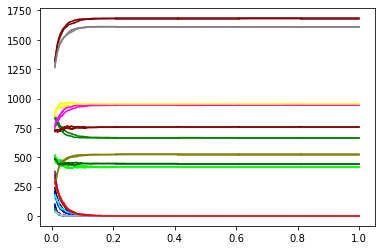

In [18]:
# Creating the Gillespy2 chemistry models in the perturb period
for time_index in range(1, len(randomDNAChem.time_params['time_array']) - 1):
    # Calculate the Gillespy2 time offset
    time_offset = randomDNAChem.time_params['t_perturb'] + randomDNAChem.time_params['t_hold'] * (time_index - 1)

    trajectories = []
    for index in range(num_trajectories):
        previous_trajectory = gillespy2_result[index] # take the gillespy2_result from the previous period

        # Creating one Gillespy2 chemistry model in one trajectory in one perturb period
        gillespy2_model = RandomDNAChemPerturbationGillespy2(non_gillespy2_chem=randomDNAChem,
                                                             rate_in_timeIndex=time_index, # index 1 for time t=1 and so on
                                                             period_start=randomDNAChem.time_params['time_array'][time_index] - time_offset,
                                                             period_end=randomDNAChem.time_params['time_array'][time_index + 1] - time_offset,
                                                             previous_gillespy2_result=previous_trajectory)
        trajectory = gillespy2_model.run(number_of_trajectories=1) # run the single trajectory
        trajectories.append(trajectory)
    gillespy2_result = trajectories # gillespy2_result of the current period

    # Result of stochastic Gillespie simulation for entire simulation time
    gillespy2_results.append(gillespy2_result)

    # Plot each of the perturb period
    for index in range(num_trajectories):
        trajectory = gillespy2_result[index]
        for species_index, species in enumerate(randomDNAChem.species_lookup['S']):
            species_plot = plt.plot(trajectory['time'] + time_offset,
                                    trajectory['{}'.format(species)],
                                    color=color_array[species_index],
                                    label=species)


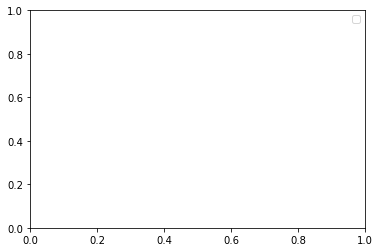

In [19]:
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')
# plot_name = 'random_dna_chem_with_perturb_junk'
try:
    plot_name
except NameError:
    plt.show()
# else:
#     plt.savefig('plots/' + plot_name + '.eps')

In [20]:
print(len(gillespy2_results))

6


In [21]:
print(gillespy2_results[0])

[{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([342., 340., 339., ..., 209., 210., 211.]), 'U1': array([607., 607., 605., ..., 196., 196., 196.]), 'U2': array([787., 786., 786., ..., 521., 520., 519.]), 'L0': array([201., 201., 203., ..., 161., 161., 161.]), 'L1': array([862., 859., 855., ..., 100., 100., 100.]), 'L2': array([911., 911., 910., ..., 852., 852., 852.]), 'L3': array([10., 10., 10., ..., 61., 61., 61.]), 'U1L1': array([ 616.,  617.,  618., ..., 1309., 1309., 1309.]), 'U0L1': array([810., 810., 811., ..., 382., 381., 380.]), 'U0L0': array([ 30.,  32.,  32., ..., 281., 281., 281.]), 'U0L3': array([ 954.,  954.,  954., ..., 1264., 1264., 1264.]), 'U1L0': array([70., 70., 70., ..., 40., 40., 40.]), 'U1L3': array([635., 634., 634., ..., 324., 324., 324.]), 'U1L2': array([698., 698., 699., ..., 757., 757., 757.]), 'U2L1': array([346., 348., 350., ..., 843., 844., 845.]), 'U2L3': array([769., 770., 770., ..., 719., 719., 719.]), 'U

In [22]:
print(gillespy2_results[0][0]) # trajectory 0 of period 0 to 0.01 --> results[period][traj]

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([342., 340., 339., ..., 209., 210., 211.]), 'U1': array([607., 607., 605., ..., 196., 196., 196.]), 'U2': array([787., 786., 786., ..., 521., 520., 519.]), 'L0': array([201., 201., 203., ..., 161., 161., 161.]), 'L1': array([862., 859., 855., ..., 100., 100., 100.]), 'L2': array([911., 911., 910., ..., 852., 852., 852.]), 'L3': array([10., 10., 10., ..., 61., 61., 61.]), 'U1L1': array([ 616.,  617.,  618., ..., 1309., 1309., 1309.]), 'U0L1': array([810., 810., 811., ..., 382., 381., 380.]), 'U0L0': array([ 30.,  32.,  32., ..., 281., 281., 281.]), 'U0L3': array([ 954.,  954.,  954., ..., 1264., 1264., 1264.]), 'U1L0': array([70., 70., 70., ..., 40., 40., 40.]), 'U1L3': array([635., 634., 634., ..., 324., 324., 324.]), 'U1L2': array([698., 698., 699., ..., 757., 757., 757.]), 'U2L1': array([346., 348., 350., ..., 843., 844., 845.]), 'U2L3': array([769., 770., 770., ..., 719., 719., 719.]), 'U2

In [23]:
print(gillespy2_results[0][1]) # trajectory 1 of period 0 to 0.01

{'time': array([0.00e+00, 1.00e-05, 2.00e-05, ..., 9.98e-03, 9.99e-03, 1.00e-02]), 'U0': array([342., 341., 342., ..., 239., 240., 241.]), 'U1': array([607., 608., 607., ..., 199., 198., 198.]), 'U2': array([787., 786., 784., ..., 475., 475., 474.]), 'L0': array([201., 200., 201., ..., 179., 179., 179.]), 'L1': array([862., 861., 856., ...,  87.,  87.,  87.]), 'L2': array([911., 911., 911., ..., 836., 836., 836.]), 'L3': array([10., 11., 13., ..., 60., 60., 60.]), 'U1L1': array([ 616.,  616.,  618., ..., 1325., 1326., 1326.]), 'U0L1': array([810., 810., 809., ..., 349., 348., 347.]), 'U0L0': array([ 30.,  30.,  30., ..., 274., 274., 274.]), 'U0L3': array([ 954.,  955.,  955., ..., 1273., 1273., 1273.]), 'U1L0': array([70., 71., 71., ..., 33., 33., 33.]), 'U1L3': array([635., 633., 632., ..., 296., 296., 296.]), 'U1L2': array([698., 698., 698., ..., 773., 773., 773.]), 'U2L1': array([346., 347., 351., ..., 873., 873., 874.]), 'U2L3': array([769., 769., 768., ..., 739., 739., 739.]), 'U2

In [24]:
print(gillespy2_results[0][2]) # trajectory 2 of period 0 to 0.01

IndexError: list index out of range

In [ ]:
print(gillespy2_results[0][0]['time']) # time element of trajectory 0 of period 0 to 0.01 --> results[period][traj][time]

In [ ]:
print(gillespy2_results[0][0]['U0']) # U0 element of trajectory 0 of period 0 to 0.01 --> results[period][traj][concen]

In [ ]:
print(gillespy2_results[1][0]['time']) # time element of trajectory 0 of period 0.01 to 0.21

In [ ]:
print(gillespy2_results[1][0]['U0']) # U0 element of trajectory 0 of period 0.01 to 0.21

In [ ]:
print(gillespy2_results[2][0]['time']) # time element of trajectory 0 of period 0.21 to 0.41

In [ ]:
print(gillespy2_results[2][0]['U0']) # U0 element of trajectory 0 of period 0.21 to 0.41

In [ ]:
print(gillespy2_results[-1][0]['time']) # time element of trajectory 0 of period 0.81 to 1.00

In [ ]:
print(gillespy2_results[-1][0]['U0']) # U0 element of trajectory 0 of period 0.81 to 1.00

In [ ]:
print(gillespy2_results[-2][0]['time'])

In [ ]:
print(gillespy2_results[-2][0]['U0'])

In [ ]:
print(gillespy2_results[5][0]['time']) # time element of trajectory 0 of period 0.81 to 1.00

In [ ]:
# Save concentration data from reservoir to be inputs of readout layers (only the one trajectory)
trajectory_in_use = 0
time_lookup = list(gillespy2_results[0][trajectory_in_use]['time']) # time vector at non-perturbed period
for time_index in range(1, len(randomDNAChem.time_params['time_array']) - 1): # time vector at perturbed period
    time_offset = randomDNAChem.time_params['t_perturb'] + randomDNAChem.time_params['t_hold'] * (time_index - 1)
    time_lookup += list(gillespy2_results[time_index][trajectory_in_use]['time'] + time_offset)

concentration_lookup = {}
for species_name in randomDNAChem.species_lookup['S']:
    concentrations = []
    for time_index in range(randomDNAChem.time_params['num_perturb'] + 1): # number of periods 
        concentrations += list(gillespy2_results[time_index][trajectory_in_use][species_name])
    concentration_lookup.update({'{}'.format(species_name): concentrations})


In [ ]:
print(time_lookup)

In [ ]:
print(time_lookup[0])

In [ ]:
print(time_lookup[-1])

In [ ]:
print(concentration_lookup['U1'])

In [ ]:
print(concentration_lookup['U1'][0])

In [ ]:
print(concentration_lookup['U1'][-1])

In [ ]:
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')
for species_index, species in enumerate(randomDNAChem.species_lookup['S']):
    species_plot = plt.plot(time_lookup, concentration_lookup[species], color=color_array[species_index], label=species)
plt.show()